# 3 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

## 3.1 Contents<a id='3.1_Contents'></a>
* [3 Exploratory Data Analysis](#3_Exploratory_Data_Analysis)
  * [3.1 Contents](#3.1_Contents)
  * [3.2 Introduction](#3.2_Introduction)
  * [3.3 Imports](#3.3_Imports)
  * [3.4 Load The Data](#3.4_Load_The_Data)
    * [3.4.1 Ski data](#3.4.1_Ski_data)
    * [3.4.2 State-wide summary data](#3.4.2_State-wide_summary_data)
  * [3.5 Explore The Data](#3.5_Explore_The_Data)
    * [3.5.1 Top States By Order Of Each Of The Summary Statistics](#3.5.1_Top_States_By_Order_Of_Each_Of_The_Summary_Statistics)
      * [3.5.1.1 Total state area](#3.5.1.1_Total_state_area)
      * [3.5.1.2 Total state population](#3.5.1.2_Total_state_population)
      * [3.5.1.3 Resorts per state](#3.5.1.3_Resorts_per_state)
      * [3.5.1.4 Total skiable area](#3.5.1.4_Total_skiable_area)
      * [3.5.1.5 Total night skiing area](#3.5.1.5_Total_night_skiing_area)
      * [3.5.1.6 Total days open](#3.5.1.6_Total_days_open)
    * [3.5.2 Resort density](#3.5.2_Resort_density)
      * [3.5.2.1 Top states by resort density](#3.5.2.1_Top_states_by_resort_density)
    * [3.5.3 Visualizing High Dimensional Data](#3.5.3_Visualizing_High_Dimensional_Data)
      * [3.5.3.1 Scale the data](#3.5.3.1_Scale_the_data)
        * [3.5.3.1.1 Verifying the scaling](#3.5.3.1.1_Verifying_the_scaling)
      * [3.5.3.2 Calculate the PCA transformation](#3.5.3.2_Calculate_the_PCA_transformation)
      * [3.5.3.3 Average ticket price by state](#3.5.3.3_Average_ticket_price_by_state)
      * [3.5.3.4 Adding average ticket price to scatter plot](#3.5.3.4_Adding_average_ticket_price_to_scatter_plot)
    * [3.5.4 Conclusion On How To Handle State Label](#3.5.4_Conclusion_On_How_To_Handle_State_Label)
    * [3.5.5 Ski Resort Numeric Data](#3.5.5_Ski_Resort_Numeric_Data)
      * [3.5.5.1 Feature engineering](#3.5.5.1_Feature_engineering)
      * [3.5.5.2 Feature correlation heatmap](#3.5.5.2_Feature_correlation_heatmap)
      * [3.5.5.3 Scatterplots of numeric features against ticket price](#3.5.5.3_Scatterplots_of_numeric_features_against_ticket_price)
  * [3.6 Summary](#3.6_Summary)


## 3.2 Introduction<a id='3.2_Introduction'></a>

At this point, you should have a firm idea of what your data science problem is and have the data you believe could help solve it. The business problem was a general one of modeling resort revenue. The data you started with contained some ticket price values, but with a number of missing values that led to several rows being dropped completely. You also had two kinds of ticket price. There were also some obvious issues with some of the other features in the data that, for example, led to one column being completely dropped, a data error corrected, and some other rows dropped. You also obtained some additional US state population and size data with which to augment the dataset, which also required some cleaning.

The data science problem you subsequently identified is to predict the adult weekend ticket price for ski resorts.

## 3.3 Imports<a id='3.3_Imports'></a>

In [11]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


## 3.4 Load The Data<a id='3.4_Load_The_Data'></a>

### 3.4.1 Ski data<a id='3.4.1_Ski_data'></a>

In [12]:
ski_data = pd.read_csv('ski_data_cleaned.csv')

In [13]:
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               277 non-null    object 
 1   Region             277 non-null    object 
 2   state              277 non-null    object 
 3   summit_elev        277 non-null    int64  
 4   vertical_drop      277 non-null    int64  
 5   base_elev          277 non-null    int64  
 6   trams              277 non-null    int64  
 7   fastSixes          277 non-null    int64  
 8   fastQuads          277 non-null    int64  
 9   quad               277 non-null    int64  
 10  triple             277 non-null    int64  
 11  double             277 non-null    int64  
 12  surface            277 non-null    int64  
 13  total_chairs       277 non-null    int64  
 14  Runs               274 non-null    float64
 15  TerrainParks       233 non-null    float64
 16  LongestRun_mi      272 non

In [14]:
ski_data.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastSixes,fastQuads,quad,...,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0,2,2,...,2.0,1.0,1610.0,113.0,150.0,60.0,669.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0,0,0,...,1.0,2.0,640.0,60.0,45.0,44.0,350.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0,0,0,...,1.0,1.0,30.0,30.0,150.0,36.0,69.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,1,0,2,...,4.0,2.0,777.0,104.0,122.0,81.0,260.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,0,1,2,...,2.0,1.2,800.0,80.0,115.0,49.0,250.0,78.0,104.0,80.0


### 3.4.2 State-wide summary data<a id='3.4.2_State-wide_summary_data'></a>

In [15]:
state_summary = pd.read_csv('state_summary.csv')

In [16]:
state_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   state                        35 non-null     object 
 1   resorts_per_state            35 non-null     int64  
 2   state_total_skiable_area_ac  35 non-null     float64
 3   state_total_days_open        35 non-null     float64
 4   state_total_terrain_parks    35 non-null     int64  
 5   state_total_nightskiing_ac   35 non-null     int64  
 6   state_population             35 non-null     int64  
 7   state_area_sq_miles          35 non-null     int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 2.3+ KB


In [17]:
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,state_population,state_area_sq_miles
0,Alaska,3,2280.0,345.0,3,2,731545,665384
1,Arizona,2,1577.0,237.0,2,1,7278717,113990
2,California,21,25948.0,2738.0,19,4,39512223,163695
3,Colorado,22,43682.0,3258.0,20,4,5758736,104094
4,Connecticut,5,358.0,353.0,4,5,3565278,5543


## 3.5 Explore The Data<a id='3.5_Explore_The_Data'></a>

### 3.5.1 Top States By Order Of Each Of The Summary Statistics<a id='3.5.1_Top_States_By_Order_Of_Each_Of_The_Summary_Statistics'></a>

What does the state-wide picture for our market look like?

In [18]:
state_summary_newind = state_summary.set_index('state')

#### 3.5.1.1 Total state area<a id='3.5.1.1_Total_state_area'></a>

In [19]:
state_summary_newind.state_area_sq_miles.sort_values(ascending=False).head()

state
Alaska        665384
California    163695
Montana       147040
New Mexico    121590
Arizona       113990
Name: state_area_sq_miles, dtype: int64

Our home state, Montana, comes in at third largest.

#### 3.5.1.2 Total state population<a id='3.5.1.2_Total_state_population'></a>

In [20]:
state_summary_newind.state_population.sort_values(ascending=False).head()

state
California      39512223
New York        19453561
Pennsylvania    12801989
Illinois        12671821
Ohio            11689100
Name: state_population, dtype: int64

California dominates the state population figures despite coming in second behind Alaska in size (by a long way). The resort's state of Montana was in the top five for size, but doesn't figure in the most populous states. Thus our state is less densely populated.

#### 3.5.1.3 Resorts per state<a id='3.5.1.3_Resorts_per_state'></a>

In [21]:
state_summary_newind.resorts_per_state.sort_values(ascending=False).head()

state
New York        33
Michigan        28
Colorado        22
California      21
Pennsylvania    19
Name: resorts_per_state, dtype: int64

New York comes top in the number of resorts in our market. Is this because of its proximity to wealthy New Yorkers wanting a convenient skiing trip? Or is it simply that its northerly location means there are plenty of good locations for resorts in that state?

#### 3.5.1.4 Total skiable area<a id='3.5.1.4_Total_skiable_area'></a>

In [22]:
state_summary_newind.state_total_skiable_area_ac.sort_values(ascending=False).head()

state
Colorado      43682.0
Utah          30508.0
California    25948.0
Montana       21410.0
Idaho         16396.0
Name: state_total_skiable_area_ac, dtype: float64

New York state may have the most resorts, but they don't account for the most skiing area. In fact, New York doesn't even make it into the top five of skiable area. Good old Montana makes it into the top five, though. We may start to think that New York has more, smaller resorts, whereas Montana has fewer, larger resorts. Colorado seems to have a name for skiing; it's in the top five for resorts and in top place for total skiable area.

#### 3.5.1.5 Total night skiing area<a id='3.5.1.5_Total_night_skiing_area'></a>

In [23]:
state_summary_newind.state_total_nightskiing_ac.sort_values(ascending=False).head()

state
New York        25
Michigan        23
Pennsylvania    17
Minnesota       13
Wisconsin       13
Name: state_total_nightskiing_ac, dtype: int64

New York dominates the area of skiing available at night. Looking at the top five in general, they are all the more northerly states. Is night skiing in and of itself an appeal to customers, or is a consequence of simply trying to extend the skiing day where days are shorter? Is New York's domination here because it's trying to maximize its appeal to visitors who'd travel a shorter distance for a shorter visit? 

#### 3.5.1.6 Total days open<a id='3.5.1.6_Total_days_open'></a>

In [24]:
state_summary_newind.state_total_days_open.sort_values(ascending=False).head()

state
Colorado         3258.0
California       2738.0
Michigan         2389.0
New York         2384.0
New Hampshire    1847.0
Name: state_total_days_open, dtype: float64

The total days open seem to bear some resemblance to the number of resorts. This is plausible. The season will only be so long, and so the more resorts open through the skiing season, the more total days open we'll see. New Hampshire makes a good effort at making it into the top five, for a small state that didn't make it into the top five of resorts per state. Does its location mean resorts there have a longer season and so stay open longer, despite there being fewer of them?

### 3.5.2 Resort density<a id='3.5.2_Resort_density'></a>

There are big states which are not necessarily the most populous. There are states that host many resorts, but other states host a larger total skiing area. The states with the most total days skiing per season are not necessarily those with the most resorts. And New York State boasts an especially large night skiing area. New York had the most resorts but wasn't in the top five largest states, so the reason for it having the most resorts can't be simply having lots of space for them. New York has the second largest population behind California. Perhaps many resorts have sprung up in New York because of the population size? Does this mean there is a high competition between resorts in New York State, fighting for customers and thus keeping prices down? We're not concerned, per se, with the absolute size or population of a state, but we could be interested in the ratio of resorts serving a given population or a given area.

So, let's calculate resort density, and drop the absolute population and state size columns.

In [25]:
# The 100_000 scaling is simply based on eyeballing the magnitudes of the data
state_summary['resorts_per_100kcapita'] = 100_000 * state_summary.resorts_per_state / state_summary.state_population
state_summary['resorts_per_100ksq_mile'] = 100_000 * state_summary.resorts_per_state / state_summary.state_area_sq_miles
state_summary.drop(columns=['state_population', 'state_area_sq_miles'], inplace=True)
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile
0,Alaska,3,2280.0,345.0,3,2,0.410091,0.450867
1,Arizona,2,1577.0,237.0,2,1,0.027477,1.754540
2,California,21,25948.0,2738.0,19,4,0.053148,12.828736
3,Colorado,22,43682.0,3258.0,20,4,0.382028,21.134744
4,Connecticut,5,358.0,353.0,4,5,0.140242,90.203861


With the removal of the two columns that only spoke to state-specific data, you now have a Dataframe that speaks to the skiing competitive landscape of each state. It has the number of resorts per state, total skiable area, and days of skiing.

How do the distributions of these two new features look?

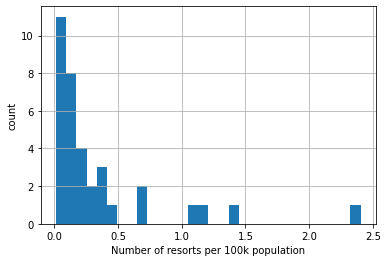

In [26]:
state_summary.resorts_per_100kcapita.hist(bins=30)
plt.xlabel('Number of resorts per 100k population')
plt.ylabel('count');

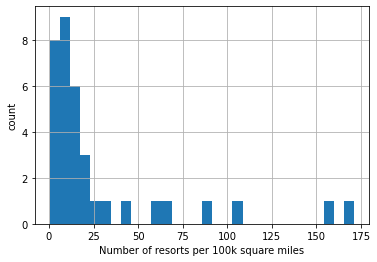

In [27]:
state_summary.resorts_per_100ksq_mile.hist(bins=30)
plt.xlabel('Number of resorts per 100k square miles')
plt.ylabel('count');

So they have quite some long tails on them, but there's definitely some structure there.

#### 3.5.2.1 Top states by resort density<a id='3.5.2.1_Top_states_by_resort_density'></a>

In [28]:
state_summary.set_index('state').resorts_per_100kcapita.sort_values(ascending=False).head()

state
Vermont          2.403889
Wyoming          1.382268
New Hampshire    1.176721
Montana          1.122778
Idaho            0.671492
Name: resorts_per_100kcapita, dtype: float64

In [29]:
state_summary.set_index('state').resorts_per_100ksq_mile.sort_values(ascending=False).head()

state
New Hampshire    171.141299
Vermont          155.990017
Massachusetts    104.225886
Connecticut       90.203861
Rhode Island      64.724919
Name: resorts_per_100ksq_mile, dtype: float64

Vermont seems particularly high in terms of resorts per capita, and both New Hampshire and Vermont top the chart for resorts per area. New York doesn't appear in either!

### 3.5.3 Visualizing High Dimensional Data<a id='3.5.3_Visualizing_High_Dimensional_Data'></a>

We have constructed some potentially useful and business relevant features, derived from summary statistics, for each of the states we're concerned with. We have explored many of these features in turn and found various trends. Some states are higher in some but not in others. Some features will also be more correlated with one another than others.

One way to disentangle this interconnected web of relationships is via [principle components analysis](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA) (PCA). This technique will find linear combinations of the original features that are uncorrelated with one another and order them by the amount of variance they explain. You can use these derived features to visualize the data in a lower dimension (e.g. 2 down from 7) and know how much variance the representation explains. You can also explore how the original features contribute to these derived features.

The basic steps in this process are:

1. scale the data (important here because our features are heterogenous)
2. fit the PCA transformation (learn the transformation from the data)
3. apply the transformation to the data to create the derived features
4. (optionally) use the derived features to look for patterns in the data and explore the coefficients

#### 3.5.3.1 Scale the data<a id='3.5.3.1_Scale_the_data'></a>

We only want numeric data here, although we don't want to lose track of the state labels, so it's convenient to set the state as the index.

In [30]:
#Code task 1#
#Create a new dataframe, `state_summary_scale` from `state_summary` whilst setting the index to 'state'
state_summary_scale = state_summary.set_index('state')
#Save the state labels into the variable 'state_summary_index'
state_summary_index = state_summary_scale.index
#Save the column names into the variable 'state_summary_columns'
state_summary_columns = state_summary_scale.columns
state_summary_scale.head()

,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile
state,,,,,,,
Alaska,3,2280.0,345.0,3,2,0.410091,0.450867
Arizona,2,1577.0,237.0,2,1,0.027477,1.754540
California,21,25948.0,2738.0,19,4,0.053148,12.828736
Colorado,22,43682.0,3258.0,20,4,0.382028,21.134744
Connecticut,5,358.0,353.0,4,5,0.140242,90.203861


The above shows what we expect: the columns we want are all numeric and the state has been moved to the index. Although, it's not necessary to step through the sequence so laboriously, it is often good practice even for experienced professionals. It's easy to make a mistake or forget a step, or the data may have been holding out a surprise! Stepping through like this helps  validate both your work and the data!

Now use `scale()` to scale the data.

In [31]:
state_summary_scale = scale(state_summary_scale)

Note, `scale()` returns an ndarray, so we lose the column names. Because you want to visualise scaled data, we already copied the column names. Now we can construct a dataframe from the ndarray here and reintroduce the column names.

In [32]:
#Code task 2#
#Create a new dataframe from `state_summary_scale` using the column names we saved in `state_summary_columns`
state_summary_scaled_df = pd.DataFrame(state_summary_scale, columns= state_summary_columns)
state_summary_scaled_df.head()

,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile
0,-0.806912,-0.392012,-0.689059,-0.747008,-0.557821,0.139593,-0.689999
1,-0.933558,-0.462424,-0.819038,-0.899015,-0.726129,-0.644706,-0.658125
2,1.472706,1.978574,2.190933,1.685110,-0.221205,-0.592085,-0.387368
3,1.599351,3.754811,2.816757,1.837117,-0.221205,0.082069,-0.184291
4,-0.553622,-0.584519,-0.679431,-0.595000,-0.052897,-0.413557,1.504408


##### 3.5.3.1.1 Verifying the scaling<a id='3.5.3.1.1_Verifying_the_scaling'></a>

First of all, check the mean of the scaled features using panda's `mean()` DataFrame method.

In [33]:
#Code task 3#
#Call `state_summary_scaled_df`'s `mean()` method
state_summary_scaled_df.mean()

resorts_per_state             -6.344132e-17
state_total_skiable_area_ac   -5.432163e-17
state_total_days_open          9.754102e-17
state_total_terrain_parks     -5.392512e-17
state_total_nightskiing_ac     5.709718e-17
resorts_per_100kcapita         5.075305e-17
resorts_per_100ksq_mile        5.075305e-17
dtype: float64

This is pretty much zero!

Perform a similar check for the standard deviation using pandas's `std()` DataFrame method.

In [34]:
#Code task 4#
#Call `state_summary_scaled_df`'s `std()` method
state_summary_scaled_df.std()

resorts_per_state              1.014599
state_total_skiable_area_ac    1.014599
state_total_days_open          1.014599
state_total_terrain_parks      1.014599
state_total_nightskiing_ac     1.014599
resorts_per_100kcapita         1.014599
resorts_per_100ksq_mile        1.014599
dtype: float64

`scale()` uses the biased estimator for standard deviation (ddof=0). but `std()` method, on the other hand, defaults to using ddof=1, that is it's normalized by N-1.

We can tell it to return the biased estimate instead:

In [35]:
#Code task 5#
#Repeat the previous call to `std()` but pass in ddof=0 
state_summary_scaled_df.std(ddof=0)

resorts_per_state              1.0
state_total_skiable_area_ac    1.0
state_total_days_open          1.0
state_total_terrain_parks      1.0
state_total_nightskiing_ac     1.0
resorts_per_100kcapita         1.0
resorts_per_100ksq_mile        1.0
dtype: float64

#### 3.5.3.2 Calculate the PCA transformation<a id='3.5.3.2_Calculate_the_PCA_transformation'></a>

Fit the PCA transformation using the scaled data.

In [36]:
state_pca = PCA().fit(state_summary_scale)

Plot the cumulative variance ratio with number of components.

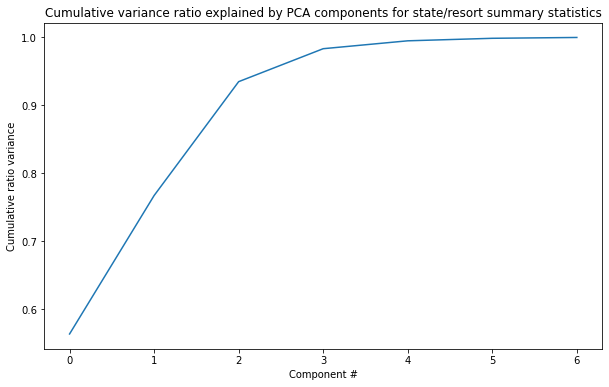

In [37]:
#Code task 6#
#Call the `cumsum()` method on the 'explained_variance_ratio_' attribute of `state_pca` and
#create a line plot to visualize the cumulative explained variance ratio with number of components
#Set the xlabel to 'Component #', the ylabel to 'Cumulative ratio variance', and the
#title to 'Cumulative variance ratio explained by PCA components for state/resort summary statistics'
#Hint: remember the handy ';' at the end of the last plot call to suppress that untidy output
plt.subplots(figsize=(10, 6))
plt.plot(state_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for state/resort summary statistics');

The first two components seem to account for over 75% of the variance, and the first four for over 95%.

Apply the transformation to the data to obtain the derived features.

In [38]:
#Code task 7#
#Call `state_pca`'s `transform()` method, passing in `state_summary_scale` as its argument
state_pca_x = state_pca.transform(state_summary_scale)

In [39]:
state_pca_x.shape

(35, 7)

Plot the first two derived features (the first two principle components) and label each point with the name of the state.

It will extract the first and second columns from the transformed data (`state_pca_x`) as x and y coordinates for plotting. Recall the state labels we saved for subsequent calls to `plt.annotate`.
Grab the second (index 1) value of the cumulative variance ratio to include in our descriptive title; this helpfully highlights the percentage variance explained by the two PCA components we're visualizing. 

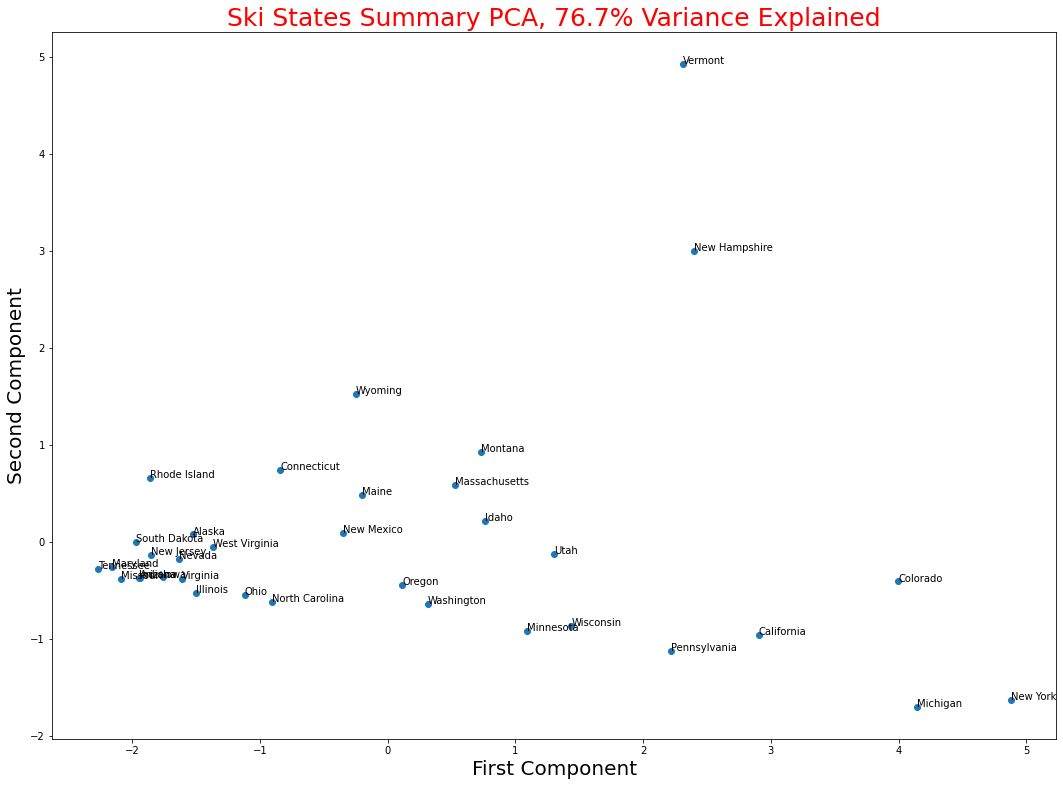

In [40]:
x = state_pca_x[:, 0]
y = state_pca_x[:, 1]
state = state_summary_index
pc_var = 100 * state_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(18,13))
plt.scatter(x=x, y=y)
plt.xlabel('First Component',fontsize=20)
plt.ylabel('Second Component',fontsize=20)
plt.title(f'Ski States Summary PCA, {pc_var:.1f}% Variance Explained', fontsize=25, color='red')
for s, x, y in zip(state, x, y):
    plt.annotate(s, (x, y))

#### 3.5.3.3 Average ticket price by state<a id='3.5.3.3_Average_ticket_price_by_state'></a>

Here, all point markers for the states are the same size and colour. We have visualized relationships between the states based on features such as the total skiable terrain area, but our ultimate interest lies in ticket prices. We know ticket prices for resorts in each state, so it might be interesting to see if there's any pattern there.

In [41]:
#Code task 8#
#Calculate the average 'AdultWeekend' ticket price by state
state_avg_price = ski_data.groupby('state')['AdultWeekend'].mean()
state_avg_price.head()

state
Alaska         57.333333
Arizona        83.500000
California     81.416667
Colorado       90.714286
Connecticut    56.800000
Name: AdultWeekend, dtype: float64

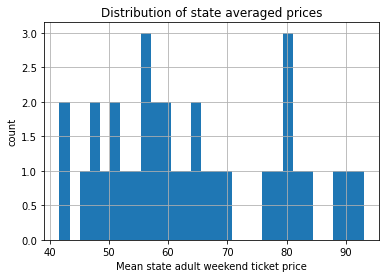

In [42]:
state_avg_price.hist(bins=30)
plt.title('Distribution of state averaged prices')
plt.xlabel('Mean state adult weekend ticket price')
plt.ylabel('count');

#### 3.5.3.4 Adding average ticket price to scatter plot<a id='3.5.3.4_Adding_average_ticket_price_to_scatter_plot'></a>

We have just calculated average ticket price by state from our ski resort data, but we've been looking at principle components generated from other state summary data. 

In [43]:
#Code task 9#
#Create a dataframe containing the values of the first two PCA components
#Remember the first component was given by state_pca_x[:, 0],
#and the second by state_pca_x[:, 1]
#Call these 'PC1' and 'PC2', respectively and set the dataframe index to `state_summary_index`
pca_df = pd.DataFrame({'PC1': state_pca_x[:,0], 'PC2': state_pca_x[:,1]}, index= state_summary_index)
pca_df.head()

,PC1,PC2
state,,
Alaska,-1.526799,0.078986
Arizona,-1.938169,-0.365978
California,2.905955,-0.952112
Colorado,3.999493,-0.404946
Connecticut,-0.839831,0.740151


In [44]:
# our average state prices also have state as an index
state_avg_price.head()

state
Alaska         57.333333
Arizona        83.500000
California     81.416667
Colorado       90.714286
Connecticut    56.800000
Name: AdultWeekend, dtype: float64

In [45]:
# we can also cast it to a dataframe using Series' to_frame() method:
state_avg_price.to_frame().head()

,AdultWeekend
state,
Alaska,57.333333
Arizona,83.500000
California,81.416667
Colorado,90.714286
Connecticut,56.800000


Now you can concatenate both parts on axis 1 and using the indexes.

In [46]:
#Code task 10#
#Use pd.concat to concatenate `pca_df` and `state_avg_price` along axis 1
# remember, pd.concat will align on index
pca_df = pd.concat([pca_df, state_avg_price], axis= 1)
pca_df.head()

,PC1,PC2,AdultWeekend
Alaska,-1.526799,0.078986,57.333333
Arizona,-1.938169,-0.365978,83.500000
California,2.905955,-0.952112,81.416667
Colorado,3.999493,-0.404946,90.714286
Connecticut,-0.839831,0.740151,56.800000


We saw some range in average ticket price histogram above, but it may be hard to pick out differences if we're thinking of using the value for point size. We'll add another column where we seperate these prices into quartiles; that might show something.

In [47]:
pca_df['Quartile'] = pd.qcut(pca_df.AdultWeekend, q=4, precision=1)
pca_df.head()

,PC1,PC2,AdultWeekend,Quartile
Alaska,-1.526799,0.078986,57.333333,"(53.1, 60.4]"
Arizona,-1.938169,-0.365978,83.500000,"(78.4, 93.0]"
California,2.905955,-0.952112,81.416667,"(78.4, 93.0]"
Colorado,3.999493,-0.404946,90.714286,"(78.4, 93.0]"
Connecticut,-0.839831,0.740151,56.800000,"(53.1, 60.4]"


In [48]:
# Note that Quartile is a new data type: category
# This will affect how we handle it later on
pca_df.dtypes

PC1              float64
PC2              float64
AdultWeekend     float64
Quartile        category
dtype: object

Do we have any missing values? It's a narrow DataFrame, only four columns, so we'll just print out any rows that have any null values, expecting an empty DataFrame.

In [49]:
pca_df[pca_df.isnull().any(axis=1)]

,PC1,PC2,AdultWeekend,Quartile
Rhode Island,-1.85715,0.662745,NaN,NaN


Ah, Rhode Island. How has this happened? Recall we created the original ski resort state summary dataset in the previous step before removing resorts with missing prices. This made sense because we wanted to capture all the other available information. However, Rhode Island only had one resort and its price was missing. We have two choices here. If we're interested in looking for any pattern with price, drop this row. But we are also generally interested in any clusters or trends, then we'd like to see Rhode Island even if the ticket price is unknown. So, replace these missing values to make it easier to handle/display them.

Because `Quartile` is a category type, there's an extra step here. Add the category (the string 'NA') that we're going to use as a replacement.

In [50]:
pca_df['AdultWeekend'].fillna(pca_df.AdultWeekend.mean(), inplace=True)
pca_df['Quartile'] = pca_df['Quartile'].cat.add_categories('NA')
pca_df['Quartile'].fillna('NA', inplace=True)
pca_df.loc['Rhode Island']

PC1             -1.85715
PC2             0.662745
AdultWeekend     64.1244
Quartile              NA
Name: Rhode Island, dtype: object

Note, in the above Quartile has the string value 'NA' that we inserted. This is different to `numpy`'s NaN type.

We now have enough information to recreate the scatterplot, now adding marker size for ticket price and colour for the discrete quartile.

Notice in the code below how we're iterating over each quartile and plotting the points in the same quartile group as one. This gives a list of quartiles for an informative legend with points coloured by quartile and sized by ticket price (higher prices are represented by larger point markers).

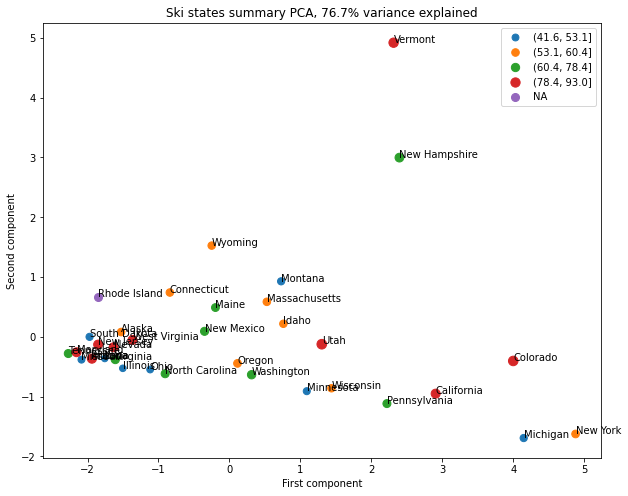

In [51]:
x = pca_df.PC1
y = pca_df.PC2
price = pca_df.AdultWeekend
quartiles = pca_df.Quartile
state = pca_df.index
pc_var = 100 * state_pca.explained_variance_ratio_.cumsum()[1]
fig, ax = plt.subplots(figsize=(10,8))
for q in quartiles.cat.categories:
    im = quartiles == q
    ax.scatter(x=x[im], y=y[im], s=price[im], label=q)
ax.set_xlabel('First component')
ax.set_ylabel('Second component')
plt.legend()
ax.set_title(f'Ski states summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(state, x, y):
    plt.annotate(s, (x, y))

Now, we see the same distribution of states as before, but with additional information about the average price. There isn't an obvious pattern. The red points representing the upper quartile of price can be seen to the left, the right, and up top. There's also a spread of the other quartiles as well. In this representation of the ski summaries for each state, which accounts for some 77% of the variance, we simply do not seeing a pattern with price.

In [52]:
pca_df.Quartile.cat.categories

Index([(41.6, 53.1], (53.1, 60.4], (60.4, 78.4], (78.4, 93.0], 'NA'], dtype='object')

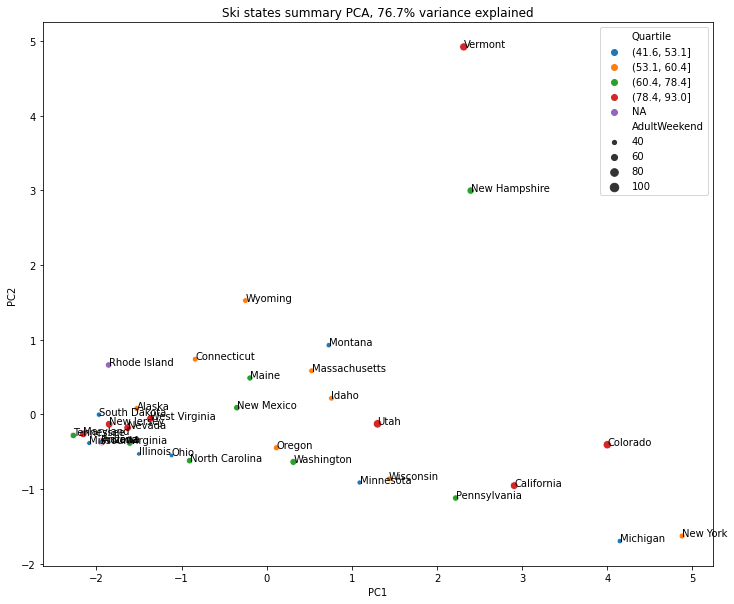

In [53]:
#Code task 11#
#Create a seaborn scatterplot by calling `sns.scatterplot`
#Specify the dataframe pca_df as the source of the data,
#specify 'PC1' for x and 'PC2' for y,
#specify 'AdultWeekend' for the pointsize (scatterplot's `size` argument),
#specify 'Quartile' for `hue`
#specify pca_df.Quartile.cat.categories for `hue_order` - what happens with/without this?
x = pca_df.PC1
y = pca_df.PC2
state = pca_df.index
plt.subplots(figsize=(12, 10))
# Note the argument below to make sure we get the colours in the ascending
# order we intuitively expect!
sns.scatterplot(x= x, y= y, size='AdultWeekend', hue= 'Quartile', 
                hue_order=pca_df.Quartile.cat.categories, data=pca_df)
#and we can still annotate with the state labels
for s, x, y in zip(state, x, y):
    plt.annotate(s, (x, y))   
plt.title(f'Ski states summary PCA, {pc_var:.1f}% variance explained');

Having gained a good visualization of the state summary data, we can discuss and follow up on our findings.

In the first two components, there is a spread of states across the first component. It looks like Vermont and New Hampshire might be off on their own a little in the second dimension, although they're really no more extreme than New York and Colorado are in the first dimension. But if we were curious, could we get an idea what it is that pushes Vermont and New Hampshire up?

The `components_` attribute of the fitted PCA object tell us how important (and in what direction) each feature contributes to each score (or coordinate on the plot). **NB we were sensible and scaled our original features (to zero mean and unit variance)**. We may not always be interested in interpreting the coefficients of the PCA transformation in this way, although it's more likely we will when using PCA for EDA as opposed to a preprocessing step as part of a machine learning pipeline. The attribute is actually a numpy ndarray, and so has been stripped of helpful index and column names. Fortunately, we ahead saved these. This is how we were able to annotate the scatter plots above. It also means we can construct a DataFrame of `components_` with the feature names for context:

In [54]:
pd.DataFrame(state_pca.components_, columns=state_summary_columns)

,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile
0,0.495670,0.277807,0.482472,0.493753,0.356655,0.175713,0.206120
1,-0.102996,-0.004121,-0.021986,-0.105755,-0.364548,0.710414,0.583201
2,-0.061779,0.742844,0.189087,-0.057126,-0.473988,0.090438,-0.415338
3,0.102316,-0.266769,-0.102339,0.024491,0.220393,0.660467,-0.650003
4,0.041884,-0.544590,0.549799,0.231537,-0.558188,-0.109948,-0.148720
5,-0.214318,-0.015081,0.633722,-0.661251,0.334965,0.051055,0.013215
6,0.825670,-0.054939,-0.128948,-0.500298,-0.207098,-0.073114,0.009456


For the row associated with the second component, are there any large values?

It looks like `resorts_per_100kcapita` and `resorts_per_100ksq_mile` might count for quite a lot, in a positive sense. Be aware that sign matters; a large negative coefficient multiplying a large negative feature will actually produce a large positive PCA score.

In [55]:
state_summary[state_summary.state.isin(['New Hampshire', 'Vermont'])].T

,17,29
state,New Hampshire,Vermont
resorts_per_state,16,15
state_total_skiable_area_ac,3427,7239
state_total_days_open,1847,1777
state_total_terrain_parks,14,12
state_total_nightskiing_ac,6,1
resorts_per_100kcapita,1.17672,2.40389
resorts_per_100ksq_mile,171.141,155.99


In [56]:
state_summary_scaled_df[state_summary.state.isin(['New Hampshire', 'Vermont'])].T

,17,29
resorts_per_state,0.839478,0.712833
state_total_skiable_area_ac,-0.277128,0.104681
state_total_days_open,1.118608,1.034363
state_total_terrain_parks,0.925073,0.621059
state_total_nightskiing_ac,0.115411,-0.726129
resorts_per_100kcapita,1.711066,4.226572
resorts_per_100ksq_mile,3.483281,3.112841


So, yes, both states have particularly large values of `resorts_per_100ksq_mile` in absolute terms, and these put them more than 3 standard deviations from the mean. Vermont also has a notably large value for `resorts_per_100kcapita`. New York, then, does not seem to be a stand-out for density of ski resorts either in terms of state size or population count.

### 3.5.4 Conclusion On How To Handle State Label<a id='3.5.4_Conclusion_On_How_To_Handle_State_Label'></a>

We can offer some justification for treating all states equally, and work towards building a pricing model that considers all states together, without treating any one particularly specially. We haven't seen any clear grouping yet, but We have captured potentially relevant state data in features most likely to be relevant to our business use case. This answers a big question!

### 3.5.5 Ski Resort Numeric Data<a id='3.5.5_Ski_Resort_Numeric_Data'></a>

In [57]:
ski_data.describe()

,summit_elev,vertical_drop,base_elev,trams,fastSixes,fastQuads,quad,triple,double,surface,...,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekend,projectedDaysOpen,NightSkiing_ac
count,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,...,233.000000,272.000000,275.000000,240.000000,233.000000,277.000000,268.000000,277.000000,236.000000,163.000000
mean,4310.386282,1106.472924,3192.050542,0.111913,0.093863,0.722022,0.945848,1.440433,1.776173,2.440433,...,2.532189,1.333824,540.141818,140.054167,111.673820,57.902527,175.171642,64.276318,117.427966,95.184049
std,3601.049728,843.706361,3064.540310,0.440400,0.358942,1.737894,1.310752,1.563009,1.835759,1.744834,...,1.618866,1.055173,910.728051,138.616661,32.719762,17.071288,131.495177,24.599877,29.141604,100.103418
min,440.000000,60.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,8.000000,2.000000,3.000000,6.000000,18.000000,17.000000,30.000000,2.000000
25%,1400.000000,450.000000,850.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.500000,82.500000,46.500000,95.000000,50.000000,65.000000,47.000000,100.000000,38.500000
50%,2400.000000,825.000000,1360.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,2.000000,1.000000,180.000000,100.000000,110.000000,58.000000,131.000000,60.000000,117.500000,70.000000
75%,7330.000000,1600.000000,5840.000000,0.000000,0.000000,1.000000,2.000000,2.000000,2.000000,3.000000,...,3.000000,2.000000,592.500000,184.500000,130.000000,70.000000,252.500000,78.000000,136.000000,104.500000
max,13487.000000,4425.000000,10800.000000,3.000000,2.000000,15.000000,8.000000,8.000000,14.000000,9.000000,...,10.000000,6.000000,8464.000000,700.000000,243.000000,104.000000,669.000000,179.000000,233.000000,650.000000


After what may feel a detour, return to examining the ski resort data. It's worth noting, the previous EDA was valuable because it's given us some potentially useful features, as well as validating an approach for how to subsequently handle the state labels in our modeling.

In [58]:
ski_data.head().T

,0,1,2,3,4
Name,Alyeska Resort,Eaglecrest Ski Area,Hilltop Ski Area,Arizona Snowbowl,Sunrise Park Resort
Region,Alaska,Alaska,Alaska,Arizona,Arizona
state,Alaska,Alaska,Alaska,Arizona,Arizona
summit_elev,3939,2600,2090,11500,11100
vertical_drop,2500,1540,294,2300,1800
base_elev,250,1200,1796,9200,9200
trams,1,0,0,0,0
fastSixes,0,0,0,1,0
fastQuads,2,0,0,0,1
quad,2,0,0,2,2


#### 3.5.5.1 Feature engineering<a id='3.5.5.1_Feature_engineering'></a>

Having previously spent some time exploring the state summary data we derived, we now start to explore the resort-level data in more detail. This can help guide us on how (or whether) to use the state labels in the data. It's now time to merge the two datasets and engineer some intuitive features. For example, we can engineer a resort's share of the supply for a given state.

In [59]:
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile
0,Alaska,3,2280.0,345.0,3,2,0.410091,0.450867
1,Arizona,2,1577.0,237.0,2,1,0.027477,1.754540
2,California,21,25948.0,2738.0,19,4,0.053148,12.828736
3,Colorado,22,43682.0,3258.0,20,4,0.382028,21.134744
4,Connecticut,5,358.0,353.0,4,5,0.140242,90.203861


In [60]:
# DataFrame's merge method provides SQL-like joins
# here 'state' is a column (not an index)
ski_data = ski_data.merge(state_summary, how='left', on='state')
ski_data.head().T

,0,1,2,3,4
Name,Alyeska Resort,Eaglecrest Ski Area,Hilltop Ski Area,Arizona Snowbowl,Sunrise Park Resort
Region,Alaska,Alaska,Alaska,Arizona,Arizona
state,Alaska,Alaska,Alaska,Arizona,Arizona
summit_elev,3939,2600,2090,11500,11100
vertical_drop,2500,1540,294,2300,1800
base_elev,250,1200,1796,9200,9200
trams,1,0,0,0,0
fastSixes,0,0,0,1,0
fastQuads,2,0,0,0,1
quad,2,0,0,2,2


Having merged our state summary features into the ski resort data, add "state resort competition" features:

* ratio of resort skiable area to total state skiable area
* ratio of resort days open to total state days open
* ratio of resort terrain park count to total state terrain park count
* ratio of resort night skiing area to total state night skiing area

Once we've derived these features to put each resort within the context of its state,drop those state columns. Their main purpose was to understand what share of states' skiing "assets" is accounted for by each resort.

In [61]:
ski_data['resort_skiable_area_ac_state_ratio'] = ski_data.SkiableTerrain_ac / ski_data.state_total_skiable_area_ac
ski_data['resort_days_open_state_ratio'] = ski_data.daysOpenLastYear / ski_data.state_total_days_open
ski_data['resort_terrain_park_state_ratio'] = ski_data.TerrainParks / ski_data.state_total_terrain_parks
ski_data['resort_night_skiing_state_ratio'] = ski_data.NightSkiing_ac / ski_data.state_total_nightskiing_ac

ski_data.drop(columns=['state_total_skiable_area_ac', 'state_total_days_open', 
                       'state_total_terrain_parks', 'state_total_nightskiing_ac'], inplace=True)

#### 3.5.5.2 Feature correlation heatmap<a id='3.5.5.2_Feature_correlation_heatmap'></a>

A great way to gain a high level view of relationships amongst the features.

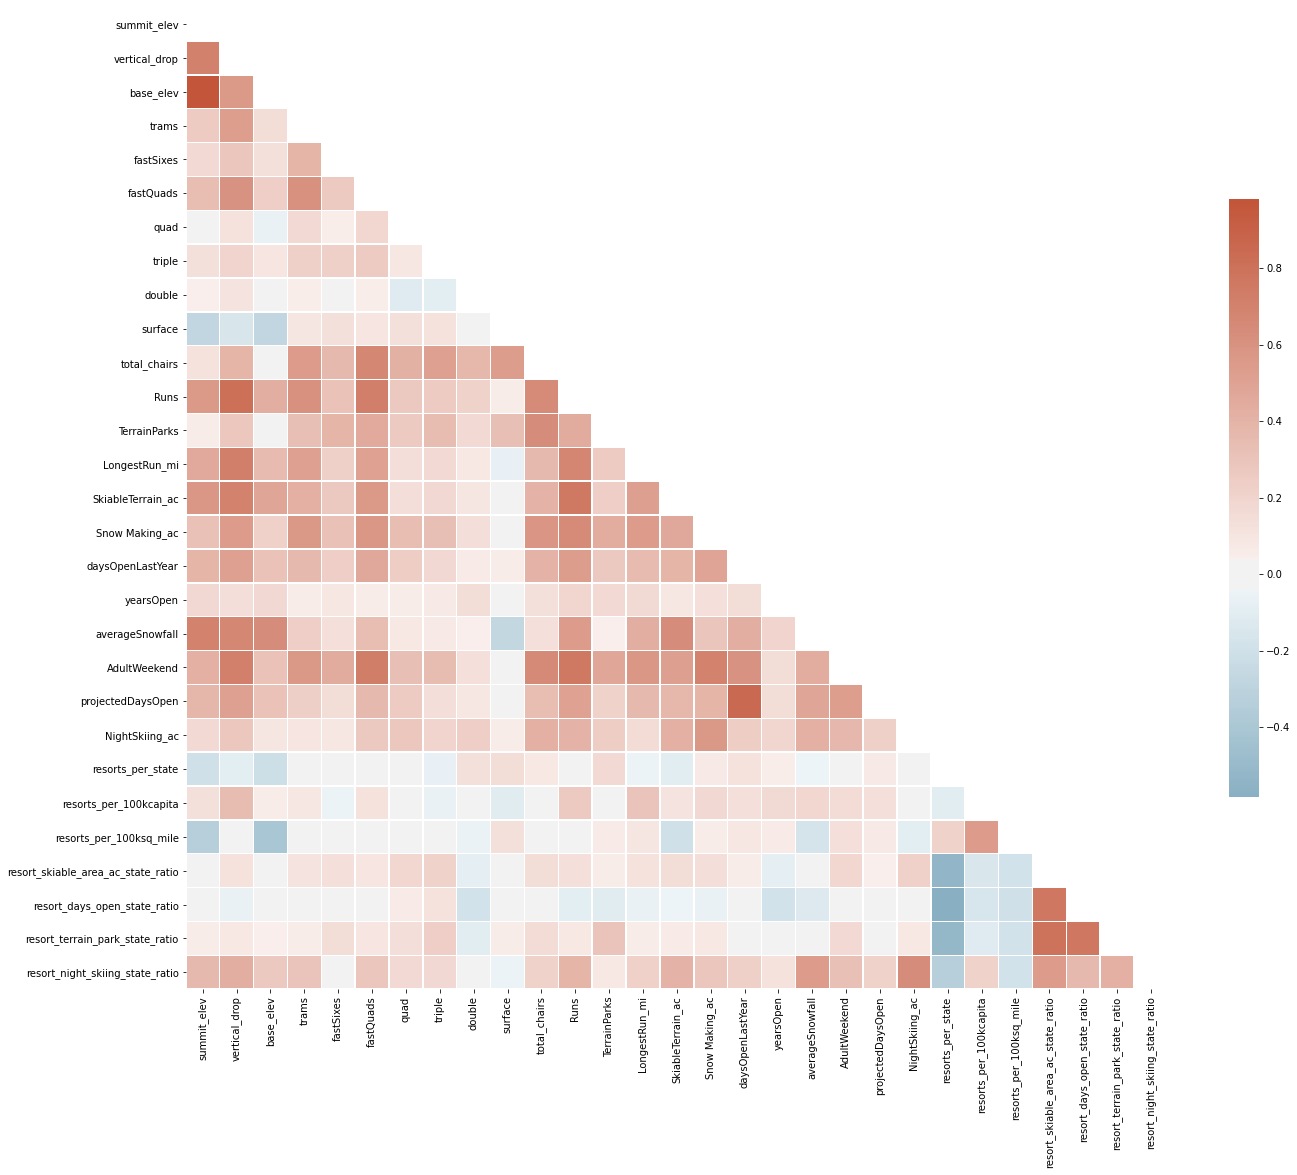

In [62]:
#Code task 12#
# Generate a mask for the upper triangle
# Generate a custom diverging colormap
#Show a seaborn heatmap of correlations in ski_data
#Hint: call pandas' `corr()` method on `ski_data` and pass that into `sns.heatmap`
corr = ski_data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.subplots(figsize=(22,22))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask,cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5});
#sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
         #   square=True, linewidths=.5, cbar_kws={"shrink": .5})

There is a lot to take away from this. First, summit and base elevation are quite highly correlated. This isn't a surprise. We can also see that we've introduced a lot of multicollinearity with our new ratio features; they are negatively correlated with the number of resorts in each state. This latter observation makes sense! If we increase the number of resorts in a state, the share of all the other state features will drop for each. An interesting observation in this region of the heatmap is that there is some positive correlation between the ratio of night skiing area with the number of resorts per capita. In other words, it seems that when resorts are more densely located with population, more night skiing is provided.

Turning our attention to our target feature, `AdultWeekend` ticket price, we see quite a few reasonable correlations. `fastQuads` stands out, along with `Runs` and `Snow Making_ac`. The last one is interesting. Visitors would seem to value more guaranteed snow, which would cost in terms of snow making equipment, which would drive prices and costs up. Of the new features, `resort_night_skiing_state_ratio` seems the most correlated with ticket price. If this is true, then perhaps seizing a greater share of night skiing capacity is positive for the price a resort can charge.

As well as `Runs`, `total_chairs` is quite well correlated with ticket price. This is plausible; the more runs we have, the more chairs we'd need to ferry people to them! Interestingly, they may count for more than the total skiable terrain area. For sure, the total skiable terrain area is not as useful as the area with snow making. People seem to put more value in guaranteed snow cover rather than more variable terrain area.

The vertical drop seems to be a selling point that raises ticket prices as well.

#### 3.5.5.3 Scatterplots of numeric features against ticket price<a id='3.5.5.3_Scatterplots_of_numeric_features_against_ticket_price'></a>

Correlations, particularly viewing them together as a heatmap, can be a great first pass at identifying patterns. But correlation can mask relationships between two variables. We'll now create a series of scatterplots to really dive into how ticket price varies with other numeric features.

In [63]:
# define useful function to create scatterplots of ticket prices against desired columns
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'AdultWeekend', data=ski_data, alpha=0.5)
        ax.set(xlabel=col, ylabel='Ticket price')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [64]:
#Code task 13#
#Use a list comprehension to build a list of features from the columns of `ski_data` that
#are _not_ any of 'Name', 'Region', 'state', or 'AdultWeekend'
features = [col for col in ski_data.columns if col not in ['Name', 'Region', 'state','AdultWeekend']]

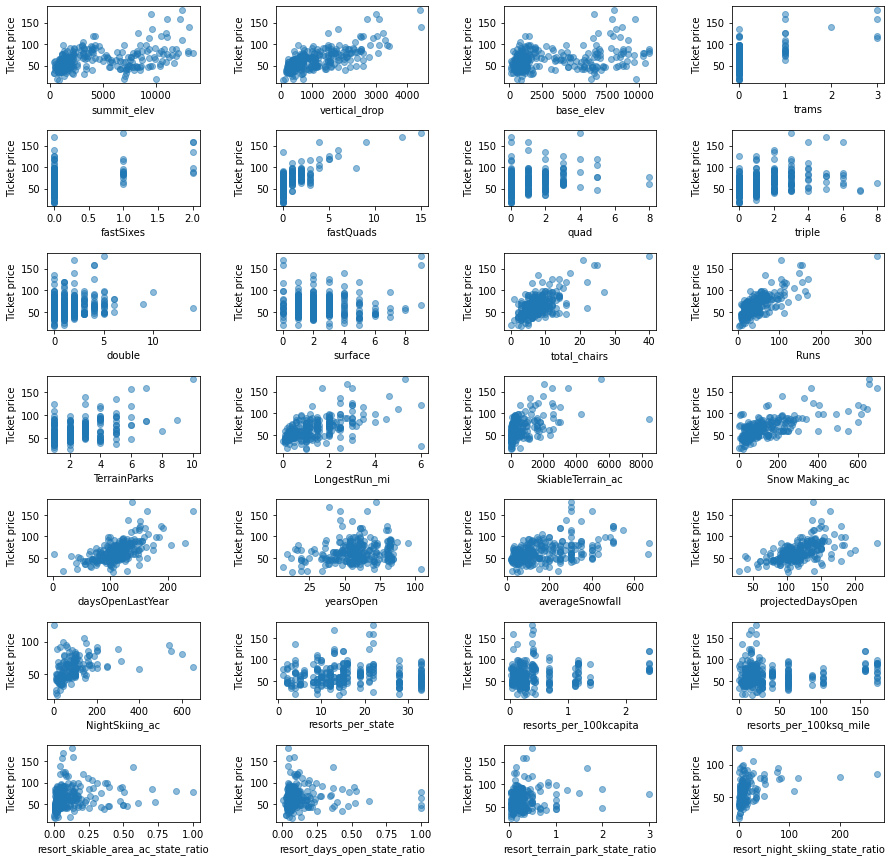

In [65]:
scatterplots(features, ncol=4, figsize=(15, 15))

In the scatterplots we see what some of the high correlations were clearly picking up on. There's a strong positive correlation with `vertical_drop`. `fastQuads` seems very useful. `Runs` and `total_chairs` appear quite similar and also useful. `resorts_per_100kcapita` shows something interesting that we don't see from just a headline correlation figure. When the value is low, there is quite a variability in ticket price, although it's capable of going quite high. Ticket price may drop a little before then climbing upwards as the number of resorts per capita increases. Ticket price could climb with the number of resorts serving a population because it indicates a popular area for skiing with plenty of demand. The lower ticket price when fewer resorts serve a population may similarly be because it's a less popular state for skiing. The high price for some resorts when resorts are rare (relative to the population size) may indicate areas where a small number of resorts can benefit from a monopoly effect. It's not a clear picture, although we have some interesting signs.

Finally, think of some further features that may be useful in that they relate to how easily a resort can transport people around. We have the numbers of various chairs, and the number of runs, but we don't have the ratio of chairs to runs. It seems logical that this ratio would inform us how easily, and so quickly, people could get to their next ski slope! Create these features now.

In [66]:
ski_data['total_chairs_runs_ratio'] = ski_data.total_chairs / ski_data.Runs
ski_data['total_chairs_skiable_ratio'] = ski_data.total_chairs / ski_data.SkiableTerrain_ac
ski_data['fastQuads_runs_ratio'] = ski_data.fastQuads / ski_data.Runs
ski_data['fastQuads_skiable_ratio'] = ski_data.fastQuads / ski_data.SkiableTerrain_ac

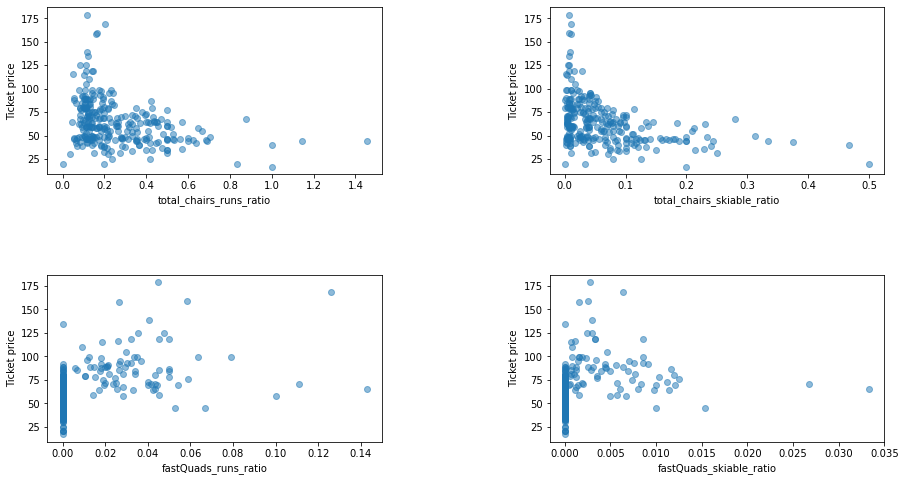

In [67]:
scatterplots(['total_chairs_runs_ratio', 'total_chairs_skiable_ratio', 
              'fastQuads_runs_ratio', 'fastQuads_skiable_ratio'], ncol=2)

At first these relationships are quite counterintuitive. It seems that the more chairs a resort has to move people around, relative to the number of runs, ticket price rapidly plummets and stays low. What we may be seeing here is an exclusive vs. mass market resort effect; if we don't have so many chairs, we can charge more for our tickets, although with fewer chairs we're inevitably going to be able to serve fewer visitors. Our price per visitor is high but our number of visitors may be low. Something very useful that's missing from the data is the number of visitors per year.

It also appears that having no fast quads may limit the ticket price, but if our resort covers a wide area then getting a small number of fast quads may be beneficial to ticket price.

## 3.6 Summary<a id='3.6_Summary'></a>

We started with two DataFrames:
’ski_data_cleaned’ that had 277 rows and 26 columns. Each row contained unique record of each ski resort in the US. First three columns were categorical ('Name', 'Region', 'state'), and 23 remaining columns were numeric.
•	summit_elev
•	vertical_drop
•	base_elev
•	trams
•	fastSixes
•	fastQuads
•	quad
•	triple
•	double
•	surface
•	total_chairs
•	Runs 
•	TerrainParks
•	LongestRun_mi
•	SkiableTerrain_ac
•	Snow Making_ac 
•	daysOpenLastYear
•	yearsOpen
•	averageSnowfall
•	AdultWeekend
•	projectedDaysOpen
•	NightSkiing_ac

And ‘state_summary’ DataFrame that had 35 rows and 8 columns. Each row contained unique record for each state. First column is categorical ('state') and 7 remaining columns are numeric:, 
•	resorts_per_state
•	state_total_skiable_area_ac
•	state_total_days_open
•	state_total_terrain_parks
•	state_total_nightskiing_ac
•	state_population
•	state_area_sq_miles
then we added two more columns:
•	resorts_per_100kcapita
•	resorts_per_100ksq_mile

exploring ‘state_summary’ dataset showed that:
•	Montana had the fewer but larger resorts, so it earned the forth rank among most skiable area. It was not among most populated states but was among top 5 states with the highest number of resorts per 100k capita.
•	New Hampshire had the highest number of resorts per 100ksq mile, and the third highest number of resorts per 100k capita. It was the fifth state with highest number of days open.
•	Vermont was ranked as second state with most number of resorts_per_100k capita.
•	Colorado had the most number of state_total_days_open.
•	New York as the second most populated state with the highest number of resorts but not large skiable area, dominated the area of skiing available at night. Also New York was the forth state in terms of total days open.
•	California as the first most populated state accounted for the third state with most skiable area with high number of resorts per state. 

‘state_summary’ DataFrame had 7 features so we need to reduce the dimension. we scaled the ‘state_summary’ DataFram to extract n dimensional array and called it ‘state_summary_scale’, and then we fit the PCA transformation using ‘state_summary_scale’ to create the derived features. The first two components accounted for over 75% of the variance, and the first four for over 95%. 

We extracted average 'AdultWeekend' ticket price by state from ‘ski_data’ DataFrame. It was hard to understand and pick the differences in ticket price in related histogram. Separating them into the quartile would be helpful.
Then we created a new DataFrame with the first two components of PCA, average 'AdultWeekend' ticket price by state and Quartile while the state was set as the its index. The row related to resort ‘Rhode Island’ missed the AdultWeekend price, in order to keep the row we adding a new category to Quartile as NA. 

Scatter plotting all data points in the rows using first and second components of PCA as x and y, AdultWeekend price as size and Quartile as hue resulted into a good visualization of state summary data. In the first two components, there was a spread of states across the first component. It looked like Vermont and New Hampshire might be off on their own a little in the second dimension, although they were really no more extreme than New York and Colorado were in the first dimension. 
To get an idea what pushed Vermont and New Hampshire up, the components attribute of the fitted PCA object which was a a numpy ndarray was extracted. The components attribute demonstrated the coefficient of PCA transformation, which helped to find how important and in which direction each feature contributed to each score (or coordinate on the plot).
After turning the components attribute into a DataFrame (column labels and state names were saved in separate variables in advance), column values for ‘New Hampshire', 'Vermont' states were checked out. In fact, large values of resorts_per_100ksq_mile caused the bigger coefficients for this feature contributed in their scores.

Ultimately, merging ski_data and state_summary on the left and adding "state resort competition" features including
•	resort_skiable_area_ac_state_ratio: ratio of resort skiable area to total state skiable area
•	resort_days_open_state_ratio: ratio of resort days open to total state days open
•	resort_terrain_park_state_ratio: ratio of resort terrain park count to total state terrain park count
•	resort_night_skiing_state_ratio: ratio of resort night skiing area to total state night skiing area
and dropping 'state_total_skiable_area_ac', 'state_total_days_open', 'state_total_terrain_parks', and 'state_total_nightskiing_ac' columns gave a new DataFrame assigned to ski_data.
By scatter plotting each feature against target feature ‘ticket price’ revealed a few reasonable correlations. fastQuads stands out, along with Runs and Snow Making_ac. The last one is interesting. Visitors would seem to value more guaranteed snow, which would cost in terms of snow making equipment, which would drive prices and costs up. Of the new features, resort_night_skiing_state_ratio seems the most correlated with ticket price. If this is true, then perhaps seizing a greater share of night skiing capacity is positive for the price a resort can charge. 
As well as Runs, total_chairs is quite well correlated with ticket price. the more runs we have, the more chairs we'd need to ferry people to them! Interestingly, they may count for more than the total skiable terrain area. For sure, the total skiable terrain area is not as useful as the area with snow making. People seem to put more value in guaranteed snow cover rather than more variable terrain area.


In [68]:
ski_data.head().T

,0,1,2,3,4
Name,Alyeska Resort,Eaglecrest Ski Area,Hilltop Ski Area,Arizona Snowbowl,Sunrise Park Resort
Region,Alaska,Alaska,Alaska,Arizona,Arizona
state,Alaska,Alaska,Alaska,Arizona,Arizona
summit_elev,3939,2600,2090,11500,11100
vertical_drop,2500,1540,294,2300,1800
base_elev,250,1200,1796,9200,9200
trams,1,0,0,0,0
fastSixes,0,0,0,1,0
fastQuads,2,0,0,0,1
quad,2,0,0,2,2


In [69]:
# Save the data 
ski_data.to_csv('ski_data_step3_features.csv', index= False)
